##                                          Home Energy Audit Recommendation Model

The scope of this project is to come up with a model to predict which projects need audits to improve energy savings given the estimated energy savings and total project cost. This will help NYSERDA achieve its targets for energy efficiency savings faster and at a lower overall cost basis. 

## Data Sourcing

The data for the project is sourced from data.ny.gov   https://data.ny.gov/Energy-Environment/Residential-Existing-Homes-One-to-Four-Units-Energ/assk-vu73


In [445]:
# Read data from datafile

import pandas as pd
res_file=pd.read_csv('./Downloads/residential/residential.csv')

C:\Users\Anupama\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Exploration and Preparation

In [446]:
#Rename columns

res_file.columns=['Report_Period','Project_ID','Site_ID','Project_County','Project_City','Project_Zip','Gas_Utility','Electric_Utility','Project_Completion_Date','Customer_Type','Performance_Indicator','Total_ProjectCost','Total_Incentive','Type_Financing','Amount_Financed','Pre_Retrofit_HeatingType','Year_HomeBuilt','Home_Size','Home_Volume','Number_Units','Measure_Type','Est_AnnualKwh_savings','est_Annualmmbtu_savings','FirstYear_Energysavings','GreenNY_Audit','Location']

In [447]:
#Drop Columns

res_df=res_file.drop(['Report_Period','Project_ID','Site_ID','Project_County','Project_City','Project_Zip','Gas_Utility','Type_Financing','Year_HomeBuilt','Home_Size','Home_Volume','Number_Units','Measure_Type','Location'],axis=1)
res_df=res_df.dropna(how='all')
res_df=res_df.dropna(axis=1,how='all')

In [448]:
res_df.dtypes

Electric_Utility             object
Project_Completion_Date      object
Customer_Type                object
Performance_Indicator        object
Total_ProjectCost             int64
Total_Incentive               int64
Amount_Financed             float64
Pre_Retrofit_HeatingType     object
Est_AnnualKwh_savings       float64
est_Annualmmbtu_savings     float64
FirstYear_Energysavings       int64
GreenNY_Audit                object
dtype: object

In [449]:
# Drop NaN

res_df=res_df.dropna(how='all')
res_df=res_df.dropna(axis=1,how='all')

In [450]:
#Merge columns total incentive & Amount financed to Incentive Amount

res_df['Incentive_Amount']=res_df.fillna(0)['Total_Incentive']+res_df.fillna(0)['Amount_Financed']
res_df2=res_df.drop(['Total_Incentive','Amount_Financed'],axis=1)

In [451]:
# Remove Outliers

res_df2=res_df2[res_df2['Incentive_Amount'] >= 1]
res_df2=res_df2[res_df2['Incentive_Amount'] < 10000]


res_df2=res_df2[res_df2['Est_AnnualKwh_savings'] >= 1]
res_df3=res_df2[res_df2['Est_AnnualKwh_savings'] < 50000]


res_df3=res_df3[res_df3['FirstYear_Energysavings'] <1500]
res_df4=res_df3[res_df3['FirstYear_Energysavings'] >=0]

res_df4=res_df4[res_df4['Total_ProjectCost'] < 20000]

res_df5=res_df4[res_df4['est_Annualmmbtu_savings'] >=0]
res_df5=res_df5[res_df5['est_Annualmmbtu_savings'] <100]


In [452]:
#Fill empty values for est_Annualmmbtu_savings

res_df5['est_Annualmmbtu_savings'].median()
res_df5['est_Annualmmbtu_savings'].fillna(25.0 , inplace=True)



In [453]:
# Get the Year of Completion
import datetime

res_df5['Project_Completion_Date']=res_df5['Project_Completion_Date'].astype(str)
res_df5['Project_Completion_Date']=res_df5['Project_Completion_Date'].str.strip('T00:00:00')

res_df5['Project_Completion_Date']=pd.to_datetime(res_df5['Project_Completion_Date'])
res_df5['Project_Completion_Date']=res_df5['Project_Completion_Date'].dt.year

## Data Analysis and Visualisation

In [454]:
import seaborn as sns

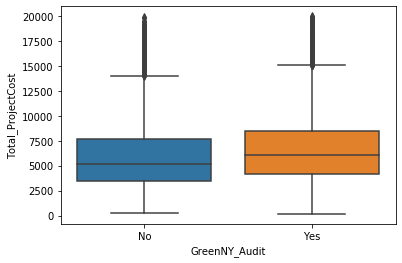

In [455]:
sns.boxplot(x='GreenNY_Audit',y='Total_ProjectCost',data=res_df5)

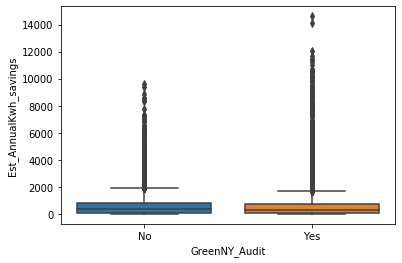

In [456]:
sns.boxplot(x='GreenNY_Audit',y='Est_AnnualKwh_savings',data=res_df5)

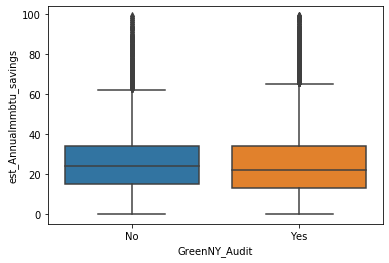

In [457]:
sns.boxplot(x='GreenNY_Audit',y='est_Annualmmbtu_savings',data=res_df5)

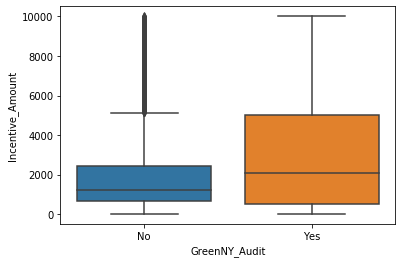

In [458]:
sns.boxplot(x='GreenNY_Audit',y='Incentive_Amount',data=res_df5)

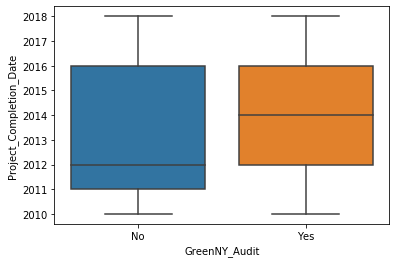

In [459]:
sns.boxplot(x='GreenNY_Audit',y='Project_Completion_Date',data=res_df5)

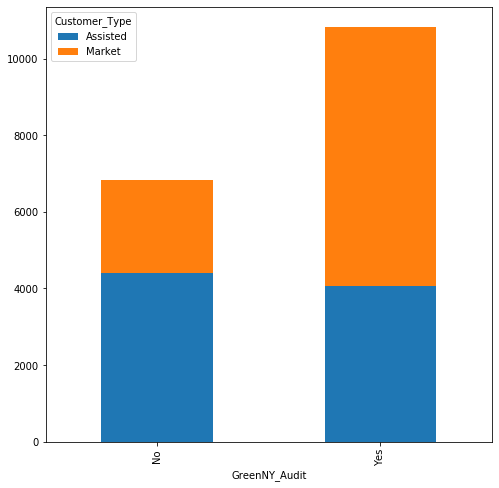

In [460]:
audit_customer_table=pd.crosstab(index=res_df5['GreenNY_Audit'],columns=res_df5['Customer_Type'])
audit_customer_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

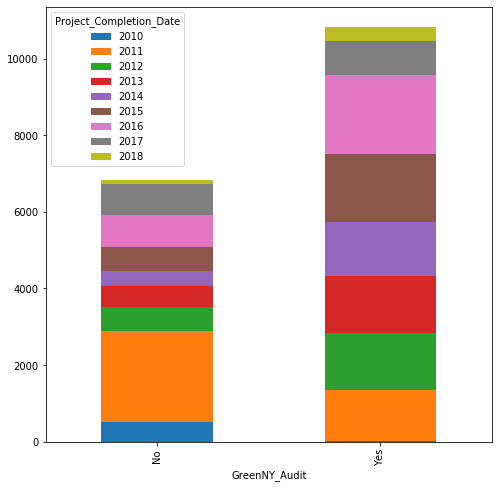

In [461]:
audit_electricalutility_table=pd.crosstab(index=res_df5['GreenNY_Audit'],columns=res_df5['Project_Completion_Date'])
audit_electricalutility_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

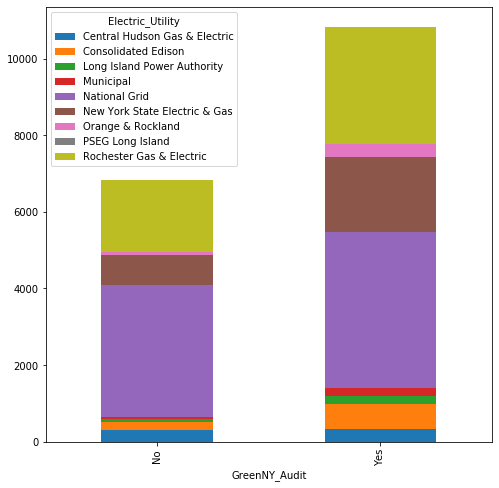

In [462]:
audit_electricalutility_table=pd.crosstab(index=res_df5['GreenNY_Audit'],columns=res_df5['Electric_Utility'])
audit_electricalutility_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

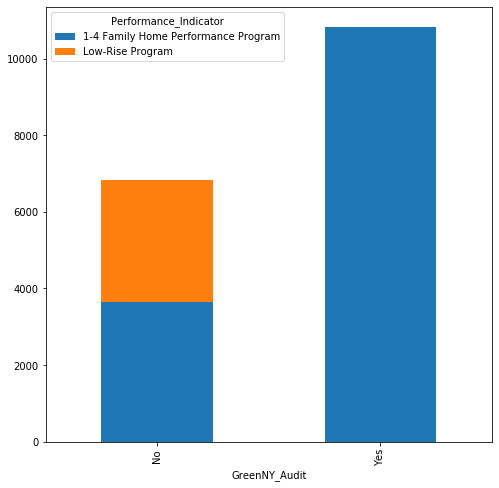

In [463]:
audit_performanceindicator_table=pd.crosstab(index=res_df5['GreenNY_Audit'],columns=res_df5['Performance_Indicator'])
audit_performanceindicator_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

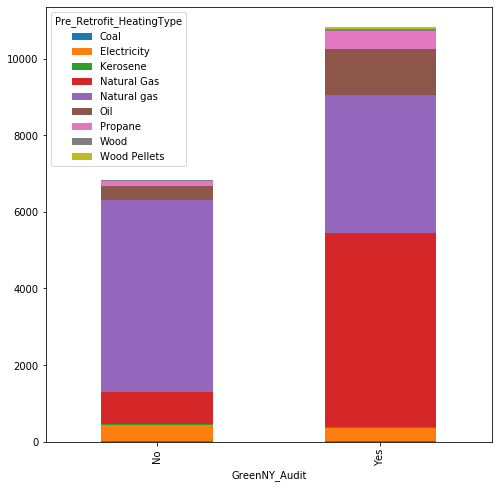

In [464]:
audit_heatingtype_table=pd.crosstab(index=res_df5['GreenNY_Audit'],columns=res_df5['Pre_Retrofit_HeatingType'])
audit_heatingtype_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

## P-value calculation

In [465]:
#ANOVA

import scipy.stats as stats
import numpy as np

stats.f_oneway(res_df5['est_Annualmmbtu_savings'][res_df5['GreenNY_Audit'] == 'Yes'],
               res_df5['est_Annualmmbtu_savings'][res_df5['GreenNY_Audit'] == 'No']) 

F_onewayResult(statistic=0.5416640901824018, pvalue=0.4617536706605868)

In [466]:
stats.f_oneway(res_df5['FirstYear_Energysavings'][res_df5['GreenNY_Audit'] == 'Yes'],
               res_df5['FirstYear_Energysavings'][res_df5['GreenNY_Audit'] == 'No']) 

F_onewayResult(statistic=0.4278889410450756, pvalue=0.5130351570746836)

In [467]:
stats.f_oneway(res_df5['Total_ProjectCost'][res_df5['GreenNY_Audit'] == 'Yes'],
               res_df5['Total_ProjectCost'][res_df5['GreenNY_Audit'] == 'No']) 

F_onewayResult(statistic=235.22201426122493, pvalue=9.4792928234863e-53)

In [468]:
stats.f_oneway(res_df5['Est_AnnualKwh_savings'][res_df5['GreenNY_Audit'] == 'Yes'],
               res_df5['Est_AnnualKwh_savings'][res_df5['GreenNY_Audit'] == 'No']) 

F_onewayResult(statistic=16.86943725779154, pvalue=4.022159338867788e-05)

In [469]:
#Chi Square

contingency_table = pd.crosstab(res_df5['GreenNY_Audit'],res_df5['Customer_Type'],margins = True)
f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)
stats.chi2_contingency(f_obs)[0:3]


(0.0, 1.0, 0)

In [470]:
contingency_table1 = pd.crosstab(res_df5['GreenNY_Audit'],res_df5['Electric_Utility'],margins = True)
f_obs1 = np.append(contingency_table1.iloc[0][0:9].values, contingency_table1.iloc[1][0:9].values)
stats.chi2_contingency(f_obs1)[0:3]

(0.0, 1.0, 0)

In [471]:
contingency_table2 = pd.crosstab(res_df5['GreenNY_Audit'],res_df5['Project_Completion_Date'],margins = True)
contingency_table2
f_obs2 = np.append(contingency_table2.iloc[0][0:9].values, contingency_table2.iloc[1][0:9].values)
stats.chi2_contingency(f_obs2)[0:3]

(0.0, 1.0, 0)

## Transformation

Text(0.5, 1.0, 'Original')

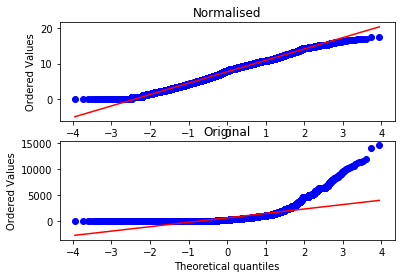

In [472]:
import matplotlib.pyplot as plt 
fig=plt.figure()
ax2=fig.add_subplot(211)
xt,_=stats.boxcox(res_df5['Est_AnnualKwh_savings'])
prob=stats.probplot(xt,dist=stats.norm,plot=ax2)
ax2.set_title('Normalised')

ax1=fig.add_subplot(212)
prob=stats.probplot(res_df5['Est_AnnualKwh_savings'],dist=stats.norm,plot=ax1)
ax1.set_title('Original')


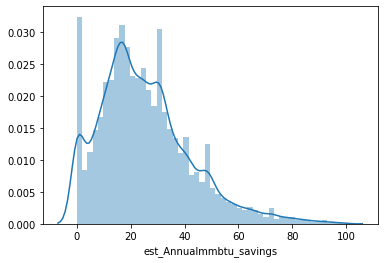

In [473]:
sns.distplot(res_df5.loc[:,'est_Annualmmbtu_savings'])

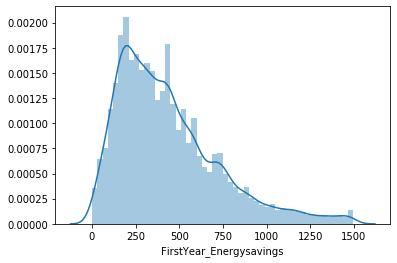

In [474]:
sns.distplot(res_df5.loc[:,'FirstYear_Energysavings'])

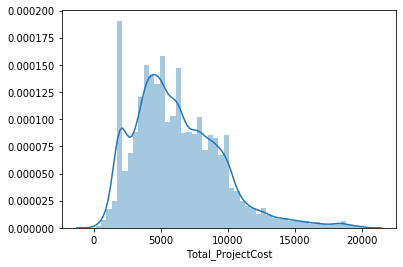

In [475]:
sns.distplot(res_df5.loc[:,'Total_ProjectCost'])

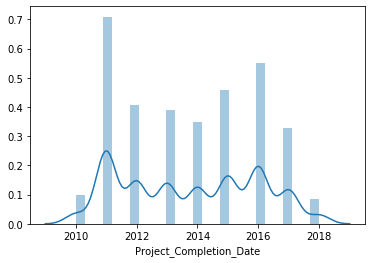

In [476]:
sns.distplot(res_df5.loc[:,'Project_Completion_Date'])

Text(0.5, 1.0, 'Original')

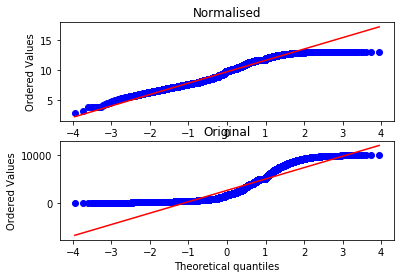

In [477]:
fig=plt.figure()
ax2=fig.add_subplot(211)
xt,_=stats.boxcox(res_df5['Incentive_Amount'])
prob=stats.probplot(xt,dist=stats.norm,plot=ax2)
ax2.set_title('Normalised')

ax1=fig.add_subplot(212)
prob=stats.probplot(res_df5['Incentive_Amount'],dist=stats.norm,plot=ax1)
ax1.set_title('Original')

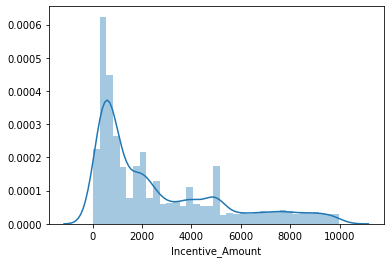

In [478]:
sns.distplot(res_df5.loc[:,'Incentive_Amount'])

## Encoding

In [479]:
#  Dummy Variable for GreenNY_Audit

greenNY_Audit=pd.get_dummies(res_df5['GreenNY_Audit'],drop_first=True)
res_df5.drop(['GreenNY_Audit'] ,axis=1,inplace=True)
res_df5=pd.concat([res_df5,greenNY_Audit],axis=1)
res_df5.rename(columns={'Yes':'GreenNY_Audit'},inplace=True)
res_df5.head()

,Electric_Utility,Project_Completion_Date,Customer_Type,Performance_Indicator,Total_ProjectCost,Pre_Retrofit_HeatingType,Est_AnnualKwh_savings,est_Annualmmbtu_savings,FirstYear_Energysavings,Incentive_Amount,GreenNY_Audit
4,National Grid,2010,Market,1-4 Family Home Performance Program,2945,Natural gas,8.0,1.0,13,295.0,0
5,Rochester Gas & Electric,2010,Market,1-4 Family Home Performance Program,3715,Natural gas,354.0,0.0,57,372.0,0
6,National Grid,2010,Market,1-4 Family Home Performance Program,6850,Oil,424.0,0.0,58,685.0,0
8,Rochester Gas & Electric,2010,Market,1-4 Family Home Performance Program,16998,Natural gas,136.0,4.0,83,1700.0,0
9,National Grid,2010,Market,1-4 Family Home Performance Program,8542,Natural gas,150.0,7.0,121,854.0,0


In [480]:
res_df5.dtypes

Electric_Utility             object
Project_Completion_Date       int64
Customer_Type                object
Performance_Indicator        object
Total_ProjectCost             int64
Pre_Retrofit_HeatingType     object
Est_AnnualKwh_savings       float64
est_Annualmmbtu_savings     float64
FirstYear_Energysavings       int64
Incentive_Amount            float64
GreenNY_Audit                 uint8
dtype: object

In [481]:
# Encoding Categorical variables 

from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
res_encoded=res_df5.select_dtypes(include=['object']).apply(le.fit_transform)
res_df5.drop(['Electric_Utility','Customer_Type','Performance_Indicator','Pre_Retrofit_HeatingType'],axis=1,inplace=True)
res_final=pd.concat([res_df5,res_encoded],axis=1)
res_final.head()

,Project_Completion_Date,Total_ProjectCost,Est_AnnualKwh_savings,est_Annualmmbtu_savings,FirstYear_Energysavings,Incentive_Amount,GreenNY_Audit,Electric_Utility,Customer_Type,Performance_Indicator,Pre_Retrofit_HeatingType
4,2010,2945,8.0,1.0,13,295.0,0,4,1,0,4
5,2010,3715,354.0,0.0,57,372.0,0,8,1,0,4
6,2010,6850,424.0,0.0,58,685.0,0,4,1,0,5
8,2010,16998,136.0,4.0,83,1700.0,0,8,1,0,4
9,2010,8542,150.0,7.0,121,854.0,0,4,1,0,4


In [482]:
#Converting to type category

for col in ['Electric_Utility','Customer_Type','Performance_Indicator','Pre_Retrofit_HeatingType','GreenNY_Audit']:
    res_final[col]= res_final[col].astype('category')

    

In [483]:
res_final.dtypes

Project_Completion_Date        int64
Total_ProjectCost              int64
Est_AnnualKwh_savings        float64
est_Annualmmbtu_savings      float64
FirstYear_Energysavings        int64
Incentive_Amount             float64
GreenNY_Audit               category
Electric_Utility            category
Customer_Type               category
Performance_Indicator       category
Pre_Retrofit_HeatingType    category
dtype: object

## Model Training

In [484]:
# Data Modelling

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#input columns to X,Y

X=res_final.drop(['GreenNY_Audit','Performance_Indicator'],axis=1)
Y=res_final[['GreenNY_Audit']]   

#Define test size
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3)


# Fit train model
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train.values.ravel())
logomodel=LogisticRegression(solver='lbfs', multi_class='auto')

#Prediction model
Predictions = logmodel.predict(x_test)

C:\Users\Anupama\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Classification Report

In [485]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59      2272
           1       0.73      0.89      0.81      3613

    accuracy                           0.73      5885
   macro avg       0.74      0.69      0.70      5885
weighted avg       0.74      0.73      0.72      5885



## Confusion Matrix

In [486]:
print(confusion_matrix(y_test, Predictions))

[[1102 1170]
 [ 390 3223]]



## Accuracy - 71.2% Precission - 69.2%

(True Positive - 1194, True Negative -3037, False Postive-531, False Negative-1123)

## Receiver operating characteristic Curve

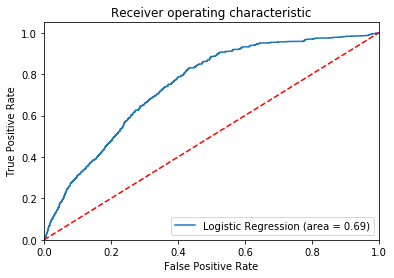

In [487]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logit Regression Summary

In [488]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train.astype(float),x_train.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.588276
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          GreenNY_Audit   No. Observations:                11768
Model:                          Logit   Df Residuals:                    11759
Method:                           MLE   Df Model:                            8
Date:                Sat, 09 Nov 2019   Pseudo R-squ.:                  0.1189
Time:                        19:00:36   Log-Likelihood:                -6922.8
converged:                       True   LL-Null:                       -7856.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Project_Completion_Date    5.43e-06   5.84e-05      0.093      0.926      -0.000

## Conclusion

#### The above model predicts if a given project will provide significant efficiency improvements from an audit. The accuracy of this prediction is ~71% which can be improved further on availability of empty data column values.